To Do:
1. Invariant eta plot with data and background
2. Add higgs, signal
3. Add cross-section to all background and signal
4. Apply blinding
5. Match data and MC
6. Apply selection cuts.
* Check why signal is not coming

In [2]:
import ROOT

In [3]:
# Function to create Lorentz vector
def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

# Function to process file and calculate invariant eta
def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant eta values
    invariant_etas = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            if not hasattr(event, 'lead_bjet_pt') or not hasattr(event, 'lead_bjet_eta') or not hasattr(event, 'lead_bjet_phi') or not hasattr(event, 'lead_bjet_mass') or not hasattr(event, 'sublead_bjet_pt') or not hasattr(event, 'sublead_bjet_eta') or not hasattr(event, 'sublead_bjet_phi') or not hasattr(event, 'sublead_bjet_mass'):
                continue

            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant eta
            invariant_eta = lv.Eta()

            # Store the invariant eta
            invariant_etas.append(invariant_eta)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant eta values
    return invariant_etas

In [4]:
# Data file paths
data_file_paths = [
    "../../output_root/Data_EraE.root",
    "../../output_root/Data_EraF.root",
    "../../output_root/Data_EraG.root"
]

# Process background files
background_files = [
    ("../../output_root/GGJets.root", "GGJets"),
    ("../../output_root/GJetPt20To40.root", "GJetPt20To40"),
    ("../../output_root/GJetPt40.root", "GJetPt40"),
    ("../../output_root/GluGluHToGG.root", "GluGluHToGG"),
    ("../../output_root/ttHToGG.root", "ttHToGG"),
    ("../../output_root/VBFHToGG.root", "VBFHToGG"),
    ("../../output_root/VHToGG.root", "VHToGG")
]

# Define the signal file path
signal_file = "../../output_root/GluGluToHH.root"




# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Branching ratio
BR_HToGG = 2.270E-03

# Cross sections for backgrounds and signal
cross_sections = {
    "GGJets": 88.75,
    "GJetPt20To40": 242.5,
    "GJetPt40": 919.1,
    "GluGluHToGG": 39.91 * BR_HToGG,
    "ttHToGG": 0.0013 * BR_HToGG ,
    "VBFHToGG": 0.00926 * BR_HToGG,
    "VHToGG": 0.00545 * BR_HToGG,
    "GluGluToHH": 0.1186
}


integrated_luminosities = {
    "Data_EraE": 5.8070,
    "Data_EraF": 17.7819,
    "Data_EraG": 3.0828
}



In [5]:
# Total integrated luminosity
total_integrated_luminosity = sum(integrated_luminosities.values())


In [6]:
# Process data files
data_invariant_etas = []
signal_etas = []
for data_file_path in data_file_paths:
    data_invariant_etas.extend(process_file(data_file_path, tree_name))

    file = ROOT.TFile(data_file_path, "READ")
    tree = file.Get(tree_name)

    if tree:
        for event in tree:
            pt = event.HHbbggCandidate_pt
            eta = event.HHbbggCandidate_eta
            phi = event.HHbbggCandidate_phi
            mass = event.HHbbggCandidate_mass

            lv_signal = create_lorentz_vector(pt, eta, phi, mass)
            signal_etas.append(lv_signal.Eta())

    file.Close()

In [7]:

# Create an empty histogram for the signal
signal_hist = ROOT.TH1F("signal_hist", "Signal Invariant Eta", 40, -5, 5)
for eta in signal_etas:
    signal_hist.Fill(eta)

In [ ]:
# # Process background files and create histograms
# background_hists = {}
# hex_colors = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
# rgb_colors = [(int(h[1:3], 16), int(h[3:5], 16), int(h[5:], 16)) for h in hex_colors]

# for i, (background_file, bg_name) in enumerate(background_files):
#     bg_invariant_masses = process_file(background_file, tree_name)
#     bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
#     for mass in bg_invariant_masses:
#         bg_hist.Fill(mass)
#     r, g, b = rgb_colors[i]
#     bg_hist.SetFillColor(ROOT.TColor.GetColor(r, g, b))
#     cross_section = cross_sections[bg_name]
#     integral = bg_hist.Integral()
#     if integral > 0:
#         bg_hist.Scale(cross_section * total_integrated_luminosity / integral)
#     else:
#         print(f"Warning: Histogram {bg_name} has zero entries.")
#     background_hists[bg_name] = bg_hist

In [9]:
# Process background files
background_hists = {}
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7, ROOT.kGreen-7, ROOT.kCyan-7, ROOT.kMagenta-7, ROOT.kViolet-7]


In [10]:
for i, (background_file, bg_name) in enumerate(background_files):
    bg_invariant_etas = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Eta", 40, -5, 5)
    for eta in bg_invariant_etas:
        bg_hist.Fill(eta)
    if i < len(background_colors):
        bg_hist.SetFillColor(background_colors[i])
    else:
        bg_hist.SetFillColor(background_colors[i % len(background_colors)])
    background_hists[bg_name] = bg_hist

Warning in <TROOT::Append>: Replacing existing TH1: hist_GGJets (Potential memory leak).


In [13]:
# Combine Higgs backgrounds into one histogram
higgs_backgrounds = ["GluGluHToGG", "ttHToGG", "VBFHToGG", "VHToGG"]
combined_higgs_hist = ROOT.TH1F("hist_Higgs", "Higgs (#rightarrow #gamma#gamma) Invariant Mass", 20, 80, 180)
higgs_color = ROOT.kRed  # Use the specified color for the Higgs histogram

for bg_name in higgs_backgrounds:
    if bg_name in background_hists:
        combined_higgs_hist.Add(background_hists[bg_name])

# Set color for the combined Higgs histogram
combined_higgs_hist.SetFillColor(higgs_color)

# Add the combined Higgs histogram to the background histograms
# background_hists["Higgs"] = combined_higgs_hist

Warning in <TROOT::Append>: Replacing existing TH1: hist_Higgs (Potential memory leak).
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <TH1Merger::DifferentAxesMerge>: Cannot merge histograms - the histograms hist_Higgs can extend the X axis or have different limits and underflows/overflows are present in the histogram hist_GluGluHToGG.
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <TH1Merger::DifferentAxesMerge>: Cannot merge histograms - the histograms hist_Higgs can extend the X axis or have different limits and underflows/overflows are present in the histogram hist_ttHToGG.
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <TH1Merger::DifferentAxesMerge>: Cannot merge histograms - the histograms hist_Higgs can extend the X axis or have different limits and underflows/overflows are present 

In [ ]:
# # Combine Higgs backgrounds into one
# higgs_backgrounds = ["GluGluHToGG", "ttHToGG", "VBFHToGG", "VHToGG"]
# combined_higgs_hist = ROOT.TH1F("hist_Higgs", "Higgs (#rightarrow #gamma#gamma) Invariant Mass", 20, 80, 180)

# for bg_name in higgs_backgrounds:
#     bg_hist = background_hists.get(bg_name)
#     if bg_hist:
#         combined_higgs_hist.Add(bg_hist)
        
        
# # Scale the combined Higgs background
# combined_higgs_cross_section = sum(cross_sections[bg_name] for bg_name in higgs_backgrounds)
# combined_higgs_hist.Scale(combined_higgs_cross_section / combined_higgs_hist.Integral())

# # Add the combined Higgs background to the legend
# legend.AddEntry(combined_higgs_hist, "Higgs (#rightarrow #gamma#gamma)", "f")

# # Draw the combined Higgs background
# combined_higgs_hist.SetFillColor(ROOT.kCyan+1)
# combined_higgs_hist.SetLineColor(ROOT.kBlack)
# combined_higgs_hist.SetLineWidth(2)
# combined_higgs_hist.Draw("SAME HIST")

In [ ]:
# # Process signal file and create histogram
# signal_invariant_masses = process_file(signal_file, tree_name)
# signal_hist = ROOT.TH1F("hist_signal", "Signal Invariant Mass", 20, 80, 180)
# for mass in signal_invariant_masses:
#     signal_hist.Fill(mass)
# signal_cross_section = cross_sections["GluGluToHH"]
# signal_integral = signal_hist.Integral()
# if signal_integral > 0:
#     signal_hist.Scale(signal_cross_section * total_integrated_luminosity / signal_integral)
# else:
#     print(f"Warning: Signal histogram has zero entries.")
# signal_hist.SetLineColor(ROOT.kRed)
# signal_hist.SetLineWidth(2)
# # Scaling 50 times
# signal_hist.Scale(100)
# # Draw signal histogram
# signal_hist.Draw("SAME HIST")

In [14]:

# Scale the signal and backgrounds
for bg_name, bg_hist in background_hists.items():
    scale_factor = (cross_sections[bg_name] * integrated_luminosities["Data_EraF"]) / bg_hist.GetEntries()
    bg_hist.Scale(scale_factor)

signal_scale_factor = (cross_sections["GluGluHToGG"] * integrated_luminosities["Data_EraF"]) / signal_hist.GetEntries()
signal_hist.Scale(signal_scale_factor)

KeyError: 'Higgs'

In [ ]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Eta", 800, 800)

# Divide the canvas into two pads, one for the main plot and one for the ratio plot
pad1 = ROOT.TPad("pad1", "Main Plot", 0, 0.3, 1, 1)
pad1.SetBottomMargin(0.02)
pad1.SetTopMargin(0.1)
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the stack of backgrounds
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)
stack.Draw("HIST")

# Draw the data
data_hist = ROOT.TH1F("data_hist", "Data Invariant Eta", 40, -5, 5)
for eta in data_invariant_etas:
    data_hist.Fill(eta)
data_hist.SetMarkerStyle(20)
data_hist.SetMarkerSize(1)
data_hist.Draw("SAME E1")

# Draw the signal
signal_hist.SetLineColor(ROOT.kRed)
signal_hist.SetLineWidth(2)
signal_hist.Draw("SAME HIST")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(data_hist, "Data", "lep")
legend.AddEntry(signal_hist, "Signal", "l")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Set y-axis range for the main plot
stack.SetMinimum(0)
stack.SetMaximum(30000)

# Set y-axis title
stack.GetYaxis().SetTitle("Events")

# Add CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Add "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Add energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.83, 0.91, "(13.6 TeV)")

# Ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "Ratio Plot", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

ratio_hist = data_hist.Clone("ratio_hist")
ratio_hist.Divide(total_background_hist)
ratio_hist.SetMarkerStyle(20)
ratio_hist.SetMarkerSize(1)
ratio_hist.SetStats(0)
ratio_hist.SetTitle("")
ratio_hist.GetYaxis().SetTitle("Data/MC")
ratio_hist.GetYaxis().SetTitleSize(0.1)
ratio_hist.GetYaxis().SetTitleOffset(0.5)
ratio_hist.GetYaxis().SetLabelSize(0.08)
ratio_hist.GetXaxis().SetTitle("#eta_{#gamma#gamma}")
ratio_hist.GetXaxis().SetTitleSize(0.12)
ratio_hist.GetXaxis().SetTitleOffset(0.9)
ratio_hist.GetXaxis().SetLabelSize(0.08)
ratio_hist.GetYaxis().SetRangeUser(0, 4)  # Adjusted range for the ratio plot
ratio_hist.Draw("E1")

# Draw horizontal lines at y=1, y=2, y=3
for y in range(0, 4):
    line = ROOT.TLine(ratio_hist.GetXaxis().GetXmin(), y, ratio_hist.GetXaxis().GetXmax(), y)
    line.SetLineStyle(2)  # Dashed line
    line.SetLineColor(ROOT.kRed)
    line.Draw()

# Save the canvas as a PDF file
# canvas.Print("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/invariant_eta_plot_with_signal_scaled_and_higgs.pdf")

# Show the canvas
canvas.Draw()

In [ ]:
# # Create a canvas
# canvas = ROOT.TCanvas("canvas", "Invariant Mass", 1000, 1200)

# # Adjust canvas to include ratio plot
# pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
# pad1.SetBottomMargin(0.02)  # join pad1 and pad2
# pad1.SetTopMargin(0.1)  # increase the top margin
# pad1.SetTicks(1, 1)
# pad1.Draw()
# pad1.cd()

# # Draw the background histograms
# stack = ROOT.THStack("stack", " ")
# for bg_name, bg_hist in background_hists.items():
#     stack.Add(bg_hist)

# # Draw the stack
# stack.Draw("HIST")

# # Create a histogram for data invariant masses
# hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
# for mass in data_invariant_masses:
#     hist_data.Fill(mass)

# # Set y-axis minimum to 0 and draw the histograms
# stack.SetMinimum(0)
# max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
# stack.SetMaximum(max_y * 1.5)

# # Remove x-axis label on the main plot
# stack.GetXaxis().SetLabelSize(0)
# stack.GetXaxis().SetTitleSize(0)

# # Set y-axis label for the main plot
# stack.GetYaxis().SetTitle("Events")
# stack.GetYaxis().SetTitleSize(0.05)

# stack.GetYaxis().SetTitleOffset(1.1)
# stack.GetYaxis().SetLabelSize(0.03)


# # Draw the stack and data histogram
# stack.Draw("HIST")
# hist_data.SetMarkerStyle(20)
# hist_data.SetMarkerSize(1.2)
# hist_data.SetMarkerColor(ROOT.kBlack)
# hist_data.Draw("SAME E1")


# # Draw signal histogram
# signal_hist.Draw("SAME HIST")


# # # Add legend
# # legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
# # legend.AddEntry(hist_data, "Data", "lep")
# # for bg_name, bg_hist in background_hists.items():
# #     legend.AddEntry(bg_hist, bg_name, "f")
# # legend.Draw()

# # Add legend
# legend = ROOT.TLegend(0.5, 0.5, 0.8, 0.8)
# legend.AddEntry(hist_data, "Data", "lep")
# legend.AddEntry(background_hists["GGJets"], "#gamma#gamma + Jets", "f")
# legend.AddEntry(background_hists["GJetPt20To40"], "#gamma + Jets (20 < p_{T} < 40)", "f")
# legend.AddEntry(background_hists["GJetPt40"], "#gamma + Jets (p_{T} > 40)", "f")
# legend.AddEntry(background_hists["GluGluHToGG"], "(GluGluHToGG)Higgs #rightarrow #gamma#gamma", "f")
# legend.AddEntry(background_hists["ttHToGG"], "(ttHToGG)Higgs #rightarrow #gamma#gamma", "f")
# legend.AddEntry(background_hists["VBFHToGG"], "(VBFHToGG)Higgs #rightarrow #gamma#gamma", "f")
# legend.AddEntry(background_hists["VHToGG"], "(VHToGG)Higgs #rightarrow #gamma#gamma", "f")
# legend.AddEntry(signal_hist, "Signal(GluGluToHH) x 50", "l")
# legend.Draw()

# # Draw CMS text
# cms_label = ROOT.TLatex()
# cms_label.SetNDC()
# cms_label.SetTextFont(61)
# cms_label.SetTextSize(0.04)
# cms_label.DrawLatex(0.1, 0.91, "CMS")

# # Draw "Work in Progress"
# work_label = ROOT.TLatex()
# work_label.SetNDC()
# work_label.SetTextFont(52)
# work_label.SetTextSize(0.03)
# work_label.DrawLatex(0.17, 0.91, "Work in Progress")

# # Draw energy information
# energy_label = ROOT.TLatex()
# energy_label.SetNDC()
# energy_label.SetTextFont(42)
# energy_label.SetTextSize(0.03)
# energy_label.DrawLatex(0.79, 0.91, "(13.6 TeV)")

# # Set ticks on all sides with smaller size
# stack.GetXaxis().SetTickSize(0.02)
# stack.GetYaxis().SetTickSize(0.02)

# # Draw ratio plot
# canvas.cd()
# pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
# pad2.SetTopMargin(0.05)
# pad2.SetBottomMargin(0.3)
# pad2.SetTicks(1, 1)
# pad2.Draw()
# pad2.cd()

# # Create a histogram for the ratio
# hist_ratio = hist_data.Clone("hist_ratio")
# mc_hist = stack.GetStack().Last().Clone("mc_hist")

# hist_ratio.Divide(mc_hist)
# hist_ratio.SetMarkerStyle(20)
# hist_ratio.SetMarkerSize(1.2)
# hist_ratio.SetMarkerColor(ROOT.kBlack)

# # Remove statistics box from the ratio plot
# hist_ratio.SetStats(0)

# # Increase text size for labels and titles
# hist_ratio.GetXaxis().SetLabelSize(0.1)
# hist_ratio.GetXaxis().SetTitleSize(0.12)
# hist_ratio.GetYaxis().SetLabelSize(0.1)
# hist_ratio.GetYaxis().SetTitleSize(0.12)

# # Draw the ratio histogram
# hist_ratio.Draw("ep")

# # Add labels and title for the ratio plot
# hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
# hist_ratio.GetYaxis().SetLabelSize(0.1)
# hist_ratio.GetYaxis().SetTitleSize(0.12)
# hist_ratio.GetYaxis().SetTitle("Data / MC")
# hist_ratio.GetYaxis().SetTitleOffset(0.25)
# hist_ratio.GetYaxis().SetNdivisions(505)
# hist_ratio.GetYaxis().SetTickLength(0.02)
# hist_ratio.GetYaxis().CenterTitle(True)


# # Set y-axis range and divisions
# hist_ratio.SetMinimum(-10)
# hist_ratio.SetMaximum(10)  # Adjust maximum as needed
# hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# # Draw horizontal lines at y=1 and y=2
# line1 = ROOT.TLine(80, -1, 180, -1)
# line1.SetLineStyle(2)  # Dashed line
# line1.SetLineColor(ROOT.kRed)
# line1.Draw()

# line2 = ROOT.TLine(80, 1, 180, 1)
# line2.SetLineStyle(2)  # Dashed line
# line2.SetLineColor(ROOT.kRed)
# line2.Draw()

# # # Save the canvas as a PDF file
# canvas.Print("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/invariant_eta_plot_blinding_higgs_Addition_signal_cross_section.pdf")

# # Show the canvas
# canvas.Draw()

# # # Clear the canvas and histograms after saving the plot
# # canvas.Clear()
# # for bg_hist in background_hists.values():
# #     bg_hist.Delete()
# # hist_data.Delete()
# # hist_ratio.Delete()
# # mc_hist.Delete()

# Mass Blinding

In [ ]:
import ROOT

In [ ]:

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name, blind_mass_range=(110, 140)):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            if not hasattr(event, 'lead_bjet_pt') or not hasattr(event, 'lead_bjet_eta') or not hasattr(event, 'lead_bjet_phi') or not hasattr(event, 'lead_bjet_mass') or not hasattr(event, 'sublead_bjet_pt') or not hasattr(event, 'sublead_bjet_eta') or not hasattr(event, 'sublead_bjet_phi') or not hasattr(event, 'sublead_bjet_mass'):
                continue

            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Apply blinding if within the specified range
            if blind_mass_range[0] <= invariant_mass <= blind_mass_range[1]:
                continue

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

In [ ]:
# Data file paths
data_file_paths = [
    "../../output_root/Data_EraE.root",
    "../../output_root/Data_EraF.root",
    "../../output_root/Data_EraG.root"
]

# Process background files
background_files = [
    ("../../output_root/GGJets.root", "GGJets"),
    ("../../output_root/GJetPt20To40.root", "GJetPt20To40"),
    ("../../output_root/GJetPt40.root", "GJetPt40"),
    ("../../output_root/GluGluHToGG.root", "GluGluHToGG"),
    ("../../output_root/ttHToGG.root", "ttHToGG"),
    ("../../output_root/VBFHToGG.root", "VBFHToGG"),
    ("../../output_root/VHToGG.root", "VHToGG")
]

# Define the signal file path
signal_file = "../../output_root/GluGluToHH.root"

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Branching ratio
BR_HToGG = 2.270E-03

# Cross sections for backgrounds and signal
cross_sections = {
    "GGJets": 88.75,
    "GJetPt20To40": 242.5,
    "GJetPt40": 919.1,
    "GluGluHToGG": 39.91 * BR_HToGG,
    "ttHToGG": 0.0013 * BR_HToGG,
    "VBFHToGG": 0.00926 * BR_HToGG,
    "VHToGG": 0.00545 * BR_HToGG,
    "GluGluToHH": 0.1186
}

integrated_luminosities = {
    "Data_EraE": 5.8070,
    "Data_EraF": 17.7819,
    "Data_EraG": 3.0828
}


In [ ]:
# Total integrated luminosity
total_integrated_luminosity = sum(integrated_luminosities.values())

# Process data files with blinding applied
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_invariant_masses.extend(process_file(data_file_path, tree_name, apply_blinding=True))


In [ ]:
# Process background files and create histograms
background_hists = {}
hex_colors = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
rgb_colors = [(int(h[1:3], 16), int(h[3:5], 16), int(h[5:], 16)) for h in hex_colors]

for i, (background_file, bg_name) in enumerate(background_files):
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    r, g, b = rgb_colors[i]
    bg_hist.SetFillColor(ROOT.TColor.GetColor(r, g, b))
    cross_section = cross_sections[bg_name]
    integral = bg_hist.Integral()
    if integral > 0:
        bg_hist.Scale(cross_section * total_integrated_luminosity / integral)
    else:
        print(f"Warning: Histogram {bg_name} has zero entries.")
    background_hists[bg_name] = bg_hist

In [ ]:
# Combine Higgs backgrounds into one
higgs_backgrounds = ["GluGluHToGG", "ttHToGG", "VBFHToGG", "VHToGG"]
combined_higgs_hist = ROOT.TH1F("hist_Higgs", "Higgs (#rightarrow #gamma#gamma) Invariant Mass", 20, 80, 180)

for bg_name in higgs_backgrounds:
    bg_hist = background_hists.get(bg_name)
    if bg_hist:
        combined_higgs_hist.Add(bg_hist)

In [ ]:
# Scale the combined Higgs background
combined_higgs_cross_section = sum(cross_sections[bg_name] for bg_name in higgs_backgrounds)
combined_higgs_hist.Scale(combined_higgs_cross_section / combined_higgs_hist.Integral())

# Process signal file and create histogram
signal_invariant_masses = process_file(signal_file, tree_name)
signal_hist = ROOT.TH1F("hist_signal", "Signal Invariant Mass", 20, 80, 180)
for mass in signal_invariant_masses:
    signal_hist.Fill(mass)
signal_cross_section = cross_sections["GluGluToHH"]
signal_integral = signal_hist.Integral()
if signal_integral > 0:
    signal_hist.Scale(signal_cross_section * total_integrated_luminosity / signal_integral)
else:
    print(f"Warning: Signal histogram has zero entries.")
signal_hist.SetLineColor(ROOT.kRed)
signal_hist.SetLineWidth(2)
# Scaling 50 times
signal_hist.Scale(100)

In [ ]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 1000, 1200)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTopMargin(0.1)  # increase the top margin
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", " ")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack
stack.Draw("HIST")

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.5)

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis label for the main plot
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleSize(0.05)
stack.GetYaxis().SetTitleOffset(1.1)
stack.GetYaxis().SetLabelSize(0.03)

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E")

# Draw the signal histogram on top of the stack and data
signal_hist.Draw("SAME HIST")

# Add a legend
legend = ROOT.TLegend(0.55, 0.55, 0.90, 0.90)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.AddEntry(hist_data, "Data", "ep")
legend.AddEntry(signal_hist, "Signal x 100", "l")
legend.AddEntry(combined_higgs_hist, "Higgs #rightarrow #gamma#gamma", "f")
for i, bg_name in enumerate(background_files):
    if bg_name[1] not in higgs_backgrounds:
        legend.AddEntry(background_hists[bg_name[1]], bg_name[1], "f")
legend.Draw()

# Prepare ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create the ratio plot
ratio_hist = hist_data.Clone("ratio_hist")
ratio_hist.SetLineColor(ROOT.kBlack)
ratio_hist.SetMarkerStyle(20)
ratio_hist.SetMarkerSize(1.2)
ratio_hist.Sumw2()
total_bg_hist = stack.GetStack().Last()
ratio_hist.Divide(total_bg_hist)
ratio_hist.SetTitle("")
ratio_hist.GetYaxis().SetTitle("Data / Bkg")
ratio_hist.GetYaxis().SetNdivisions(505)
ratio_hist.GetYaxis().SetTitleSize(20)
ratio_hist.GetYaxis().SetTitleFont(43)
ratio_hist.GetYaxis().SetTitleOffset(1.55)
ratio_hist.GetYaxis().SetLabelFont(43)
ratio_hist.GetYaxis().SetLabelSize(15)
ratio_hist.GetXaxis().SetTitle("Invariant Mass (GeV)")
ratio_hist.GetXaxis().SetTitleSize(20)
ratio_hist.GetXaxis().SetTitleFont(43)
ratio_hist.GetXaxis().SetTitleOffset(4.0)
ratio_hist.GetXaxis().SetLabelFont(43)
ratio_hist.GetXaxis().SetLabelSize(15)

# Draw the ratio plot
ratio_hist.Draw("ep")




# # Save the canvas as a PDF file
canvas.Print("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/invariant_mass_plot_blinding_higgs_Addition_signal_blinding.pdf")

# Show the canvas
canvas.Draw()

# Eta plotting

In [6]:
import ROOT

def create_lorentz_vector(pt, eta, phi, mass):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, mass)
    return lv

def process_file(file_path, tree_name):
    file = ROOT.TFile(file_path, "READ")
    tree = file.Get(tree_name)

    invariant_etas = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_pt = event.lead_pt
            lead_eta = event.lead_eta
            lead_phi = event.lead_phi
            lead_energyRaw = event.lead_energyRaw

            sublead_pt = event.sublead_pt
            sublead_eta = event.sublead_eta
            sublead_phi = event.sublead_phi
            sublead_energyRaw = event.sublead_energyRaw

            lv1 = create_lorentz_vector(lead_pt, lead_eta, lead_phi, lead_energyRaw)
            lv2 = create_lorentz_vector(sublead_pt, sublead_eta, sublead_phi, sublead_energyRaw)
            invariant_eta = (lv1 + lv2).Eta()

            invariant_etas.append(invariant_eta)

    file.Close()
    return invariant_etas

In [9]:
# Data file paths
data_file_paths = [
    "../../output_root/Data_EraE.root",
    "../../output_root/Data_EraF.root",
    "../../output_root/Data_EraG.root"
]

# Process background files
background_files = [
    ("../../output_root/GGJets.root", "GGJets"),
    ("../../output_root/GJetPt20To40.root", "GJetPt20To40"),
    ("../../output_root/GJetPt40.root", "GJetPt40"),
    ("../../output_root/GluGluHToGG.root", "GluGluHToGG"),
    ("../../output_root/ttHToGG.root", "ttHToGG"),
    ("../../output_root/VBFHToGG.root", "VBFHToGG"),
    ("../../output_root/VHToGG.root", "VHToGG")
]

# Define the signal file path
signal_file = "../../output_root/GluGluToHH.root"




# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Branching ratio
BR_HToGG = 2.270E-03

# Cross sections for backgrounds and signal
cross_sections = {
    "GGJets": 88.75,
    "GJetPt20To40": 242.5,
    "GJetPt40": 919.1,
    "GluGluHToGG": 39.91 * BR_HToGG,
    "ttHToGG": 0.0013 * BR_HToGG ,
    "VBFHToGG": 0.00926 * BR_HToGG,
    "VHToGG": 0.00545 * BR_HToGG,
    "GluGluToHH": 0.1186
}


integrated_luminosities = {
    "Data_EraE": 5.8070,
    "Data_EraF": 17.7819,
    "Data_EraG": 3.0828
}



In [10]:
# Process data files
data_invariant_etas = []
signal_etas = []
for data_file_path in data_file_paths:
    data_invariant_etas.extend(process_file(data_file_path, tree_name))

    file = ROOT.TFile(data_file_path, "READ")
    tree = file.Get(tree_name)

    if tree:
        for event in tree:
            pt = event.HHbbggCandidate_pt
            eta = event.HHbbggCandidate_eta
            phi = event.HHbbggCandidate_phi
            mass = event.HHbbggCandidate_mass

            lv_signal = create_lorentz_vector(pt, eta, phi, mass)
            signal_etas.append(lv_signal.Eta())

    file.Close()

# Process background files
background_hists = {}
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7, ROOT.kGreen-7, ROOT.kCyan-7, ROOT.kMagenta-7, ROOT.kViolet-7]


In [11]:
for i, (background_file, bg_name) in enumerate(background_files):
    bg_invariant_etas = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Eta", 40, -5, 5)
    for eta in bg_invariant_etas:
        bg_hist.Fill(eta)
    if i < len(background_colors):
        bg_hist.SetFillColor(background_colors[i])
    else:
        bg_hist.SetFillColor(background_colors[i % len(background_colors)])
    background_hists[bg_name] = bg_hist


In [12]:
# Combine all backgrounds into a single histogram
total_background_hist = None
for bg_hist in background_hists.values():
    if total_background_hist is None:
        total_background_hist = bg_hist.Clone()
    else:
        total_background_hist.Add(bg_hist)


In [14]:
# Scale the signal and backgrounds
for bg_name, bg_hist in background_hists.items():
    scale_factor = (cross_sections[bg_name] * integrated_luminosities["Data_EraF"]) / bg_hist.GetEntries()
    bg_hist.Scale(scale_factor)



In [15]:
# Create an empty histogram for the signal
signal_hist = ROOT.TH1F("signal_hist", "Signal Invariant Eta", 40, -5, 5)
signal_scale_factor = (cross_sections["GluGluHToGG"] * integrated_luminosities["Data_EraF"]) / len(signal_etas)
signal_hist.Scale(signal_scale_factor)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Info in <TCanvas::Print>: pdf file /afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/invariant_eta_plot_Cross_section.pdf has been created


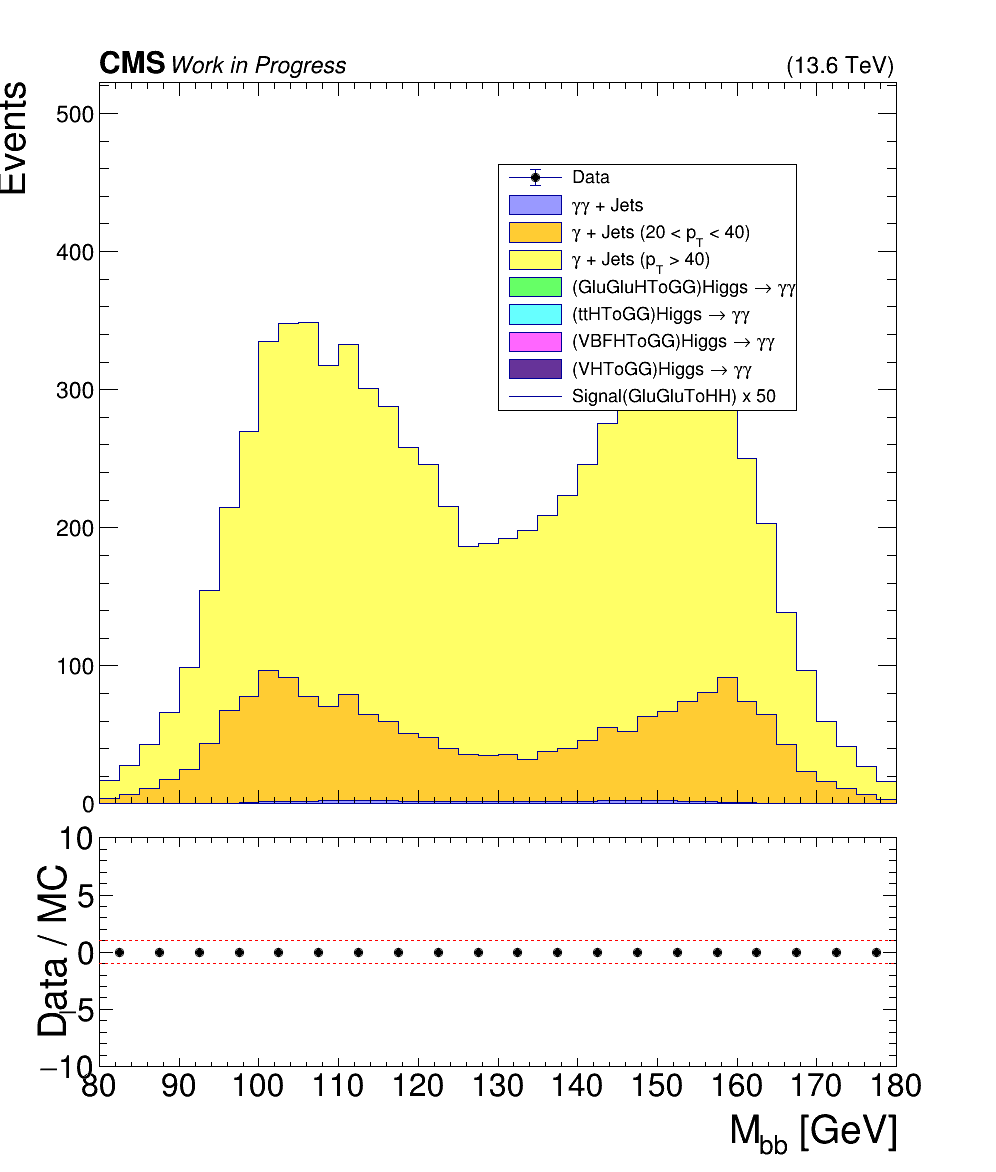

In [17]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 1000, 1200)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTopMargin(0.1)  # increase the top margin
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", " ")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack
stack.Draw("HIST")

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
# for mass in data_invariant_masses:
#     if not (110 <= mass <= 140):  # Apply blinding
#         hist_data.Fill(mass)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.5)

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis label for the main plot
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleSize(0.05)

stack.GetYaxis().SetTitleOffset(1.1)
stack.GetYaxis().SetLabelSize(0.03)


# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")


# Draw signal histogram
signal_hist.Draw("SAME HIST")


# Add legend
legend = ROOT.TLegend(0.5, 0.5, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
legend.AddEntry(background_hists["GGJets"], "#gamma#gamma + Jets", "f")
legend.AddEntry(background_hists["GJetPt20To40"], "#gamma + Jets (20 < p_{T} < 40)", "f")
legend.AddEntry(background_hists["GJetPt40"], "#gamma + Jets (p_{T} > 40)", "f")
legend.AddEntry(background_hists["GluGluHToGG"], "(GluGluHToGG)Higgs #rightarrow #gamma#gamma", "f")
legend.AddEntry(background_hists["ttHToGG"], "(ttHToGG)Higgs #rightarrow #gamma#gamma", "f")
legend.AddEntry(background_hists["VBFHToGG"], "(VBFHToGG)Higgs #rightarrow #gamma#gamma", "f")
legend.AddEntry(background_hists["VHToGG"], "(VHToGG)Higgs #rightarrow #gamma#gamma", "f")
legend.AddEntry(signal_hist, "Signal(GluGluToHH) x 50", "l")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.17, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.79, 0.91, "(13.6 TeV)")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetTitle("Data / MC")
hist_ratio.GetYaxis().SetTitleOffset(0.25)
hist_ratio.GetYaxis().SetNdivisions(505)
hist_ratio.GetYaxis().SetTickLength(0.02)
hist_ratio.GetYaxis().CenterTitle(True)


# Set y-axis range and divisions
hist_ratio.SetMinimum(-10)
hist_ratio.SetMaximum(10)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, -1, 180, -1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 1, 180, 1)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Save the canvas as a PDF file
canvas.Print("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/invariant_eta_plot_Cross_section.pdf")

# Show the canvas
canvas.Draw()

